## import packages

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import lightgbm as lgb

pd.set_option('display.max_columns', None)

## data loading

In [2]:
dir_temp = '/glade/scratch/wmingch/ML_project/Zillow_prize/temp_data/'
train_combined = pd.read_hdf(dir_temp + 'train_combined.h5', 'train_combined')

In [3]:
train_combined.head()

,parcelid,logerror,cooling_id,architecture_style_id,basement_sqft,bathroom_cnt,bedroom_cnt,framing_id,quality_id,deck_id,floor1_sqft,finished_area_sqft_calc,perimeter_area,floor1_sqft_unk,base_total_area,fips,fireplace_cnt,bathroom_full_cnt,garage_cnt,garage_sqft,spa_flag,heating_id,latitude,longitude,lot_sqft,pool_cnt,pool_total_size,pool_unk_1,pool_unk_2,pool_unk_3,landuse_type_id,census_1,city_id,county_id,neighborhood_id,region_zip,room_cnt,story_id,bathroom_small_cnt,construction_id,unit_cnt,patio_sqft,storage_sqft,year_built,story_cnt,fireplace_flag,tax_structure,tax_parcel,tax_year,tax_land,tax_property,tax_overdue_flag,tax_overdue_year,census_2,county_landuse_code_id,zoning_description_id,avg_garage_size,property_tax_per_sqft,location_1,location_2,location_3,location_4,missing_finished_area,missing_total_area,missing_bathroom_cnt_calc,derived_room_cnt,avg_area_per_room,derived_avg_area_per_room,year,month,quarter
0,11016594,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,NaN,NaN,1684.0,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,261.0,6.037107e+07,12447.0,0.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,3.0,79.0,NaN,3.999929,-84207546.0,152769526.0,-24963278.0,93525258.0,0.0,1.0,0.0,5.0,NaN,336.800000,0,1,1
1,14366692,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,2263.0,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,261.0,6.059052e+07,32380.0,1.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,36.0,NaN,234.0,4.486531,-84009436.0,151345676.0,-25170658.0,92506898.0,0.0,1.0,0.0,7.5,NaN,301.733333,0,1,1
2,12098116,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,NaN,NaN,2217.0,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,261.0,6.037464e+07,47019.0,0.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,3.0,604.0,NaN,5.180189,-84038720.0,152311344.0,-24951204.0,93223828.0,0.0,1.0,0.0,5.0,NaN,443.400000,0,1,1
3,12643413,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,NaN,NaN,839.0,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,266.0,6.037296e+07,12447.0,0.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,13.0,626.0,NaN,3.633778,-84553200.0,152064800.0,-25398700.0,92910300.0,0.0,1.0,0.0,4.0,NaN,209.750000,0,1,1
4,14432541,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,NaN,NaN,2283.0,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,261.0,6.059042e+07,17686.0,1.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,16.0,NaN,299.0,2.404275,-84214591.0,151185877.0,-25364474.0,92335760.0,0.0,1.0,0.0,6.5,285.375,351.230769,0,1,1


In [4]:
properties_2016_df = pd.read_hdf(dir_temp + 'properties_2016.h5', 'properties_2016_df')
properties_2017_df = pd.read_hdf(dir_temp + 'properties_2017.h5', 'properties_2017_df')

In [5]:
properties_2016_df.head()

,parcelid,cooling_id,architecture_style_id,basement_sqft,bathroom_cnt,bedroom_cnt,framing_id,quality_id,deck_id,floor1_sqft,finished_area_sqft_calc,perimeter_area,floor1_sqft_unk,base_total_area,fips,fireplace_cnt,bathroom_full_cnt,garage_cnt,garage_sqft,spa_flag,heating_id,latitude,longitude,lot_sqft,pool_cnt,pool_total_size,pool_unk_1,pool_unk_2,pool_unk_3,landuse_type_id,census_1,city_id,county_id,neighborhood_id,region_zip,room_cnt,story_id,bathroom_small_cnt,construction_id,unit_cnt,patio_sqft,storage_sqft,year_built,story_cnt,fireplace_flag,tax_structure,tax_parcel,tax_year,tax_land,tax_property,tax_overdue_flag,tax_overdue_year,census_2,county_landuse_code_id,zoning_description_id,avg_garage_size,property_tax_per_sqft,location_1,location_2,location_3,location_4,missing_finished_area,missing_total_area,missing_bathroom_cnt_calc,derived_room_cnt,avg_area_per_room,derived_avg_area_per_room
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,269.0,6.037800e+07,37688.0,0.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,-84509642.0,152798526.0,-25182600.0,93471484.0,1.0,1.0,1.0,0.0,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,261.0,6.037800e+07,37688.0,0.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,28.0,279.0,NaN,NaN,-84484934.0,152765794.0,-25172252.0,93453112.0,1.0,1.0,1.0,0.0,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,47.0,6.037703e+07,51617.0,0.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN,25.0,411.0,NaN,0.284835,-84405274.0,152383992.0,-25207957.5,93186675.5,1.0,0.0,1.0,0.0,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,5068.0,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,47.0,6.037141e+07,12447.0,0.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN,25.0,411.0,NaN,2.872449,-84288343.0,152586069.0,-25069740.0,93367466.0,1.0,0.0,1.0,0.0,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,1776.0,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,31.0,6.037123e+07,12447.0,0.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN,48.0,194.0,NaN,3.223632,-84191648.0,152579984.0,-24998740.0,93387076.0,1.0,0.0,1.0,0.0,NaN,NaN


## training preparation 

In [6]:
def drop_features(train):
    # parcelid and label (not features)
    unused_feature_list = ['parcelid', 'logerror']
    
    # too many missing (LightGBM is robust against bad/unrelated features, so this step might not be needed)
    missing_list = ['framing_id', 'architecture_style_id', 'story_id', 'perimeter_area', 'basement_sqft', 'storage_sqft']
    unused_feature_list += missing_list
    
    # not useful
    bad_feature_list = ['fireplace_flag', 'deck_id', 'pool_unk_1', 'construction_id', 'county_id', 'fips']
    unused_feature_list += bad_feature_list
    
    # really hurts performance
    unused_feature_list += ['county_landuse_code_id', 'zoning_description_id']
    
    return train.drop(unused_feature_list, axis=1, errors='ignore')

In [7]:
lgb_features = drop_features(train_combined)
print('Number of features for LightGBM: {}'.format(len(lgb_features.columns)))
lgb_features.head()

Number of features for LightGBM: 55


,cooling_id,bathroom_cnt,bedroom_cnt,quality_id,floor1_sqft,finished_area_sqft_calc,floor1_sqft_unk,base_total_area,fireplace_cnt,bathroom_full_cnt,garage_cnt,garage_sqft,spa_flag,heating_id,latitude,longitude,lot_sqft,pool_cnt,pool_total_size,pool_unk_2,pool_unk_3,landuse_type_id,census_1,city_id,neighborhood_id,region_zip,room_cnt,bathroom_small_cnt,unit_cnt,patio_sqft,year_built,story_cnt,tax_structure,tax_parcel,tax_year,tax_land,tax_property,tax_overdue_flag,tax_overdue_year,census_2,avg_garage_size,property_tax_per_sqft,location_1,location_2,location_3,location_4,missing_finished_area,missing_total_area,missing_bathroom_cnt_calc,derived_room_cnt,avg_area_per_room,derived_avg_area_per_room,year,month,quarter
0,1.0,2.0,3.0,4.0,NaN,1684.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,261.0,6.037107e+07,12447.0,31817.0,96370.0,0.0,NaN,1.0,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,NaN,3.999929,-84207546.0,152769526.0,-24963278.0,93525258.0,0.0,1.0,0.0,5.0,NaN,336.800000,0,1,1
1,NaN,3.5,4.0,NaN,NaN,2263.0,NaN,NaN,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,261.0,6.059052e+07,32380.0,NaN,96962.0,0.0,1.0,NaN,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,234.0,4.486531,-84009436.0,151345676.0,-25170658.0,92506898.0,0.0,1.0,0.0,7.5,NaN,301.733333,0,1,1
2,1.0,3.0,2.0,4.0,NaN,2217.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,261.0,6.037464e+07,47019.0,275411.0,96293.0,0.0,NaN,1.0,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,NaN,5.180189,-84038720.0,152311344.0,-24951204.0,93223828.0,0.0,1.0,0.0,5.0,NaN,443.400000,0,1,1
3,1.0,2.0,2.0,4.0,NaN,839.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,266.0,6.037296e+07,12447.0,54300.0,96222.0,0.0,NaN,1.0,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,NaN,3.633778,-84553200.0,152064800.0,-25398700.0,92910300.0,0.0,1.0,0.0,4.0,NaN,209.750000,0,1,1
4,NaN,2.5,4.0,NaN,NaN,2283.0,NaN,NaN,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,1.0,261.0,6.059042e+07,17686.0,NaN,96961.0,8.0,1.0,NaN,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,299.0,2.404275,-84214591.0,151185877.0,-25364474.0,92335760.0,0.0,1.0,0.0,6.5,285.375,351.230769,0,1,1


In [8]:
# target 
lgb_label = train_combined.logerror.astype(np.float32)

# transform to Numpy matrices
lgb_X = lgb_features.values
lgb_y = lgb_label.values

# train and test split 
X_train, X_val, y_train, y_val = train_test_split(lgb_X, lgb_y, test_size=0.2,  random_state=26)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

#remove outlier from X_train and y_train
outlier_threshold = 0.4
mask = (abs(y_train) <= outlier_threshold)
X_train = X_train[mask, :]
y_train = y_train[mask]

print("...... After remove outlier abs(logerror) > 0.4 ......")
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (134310, 55)
y_train shape: (134310,)
X_val shape: (33578, 55)
y_val shape: (33578,)
...... After remove outlier abs(logerror) > 0.4 ......
X_train shape: (131445, 55)
y_train shape: (131445,)
X_val shape: (33578, 55)
y_val shape: (33578,)


In [9]:
# Specify feature names and categorical features for LightGBM
feature_names = [s for s in lgb_features.columns]
categorical_features = ['cooling_id', 'heating_id', 'landuse_type_id', 'year', 'month', 'quarter']

categorical_indices = []
for idx, val in enumerate(lgb_features.columns):
    if val in categorical_features:
        print(val)
        categorical_indices.append(idx)
print(categorical_indices)

cooling_id
heating_id
landuse_type_id
year
month
quarter
[0, 13, 21, 52, 53, 54]


## LightGBM 

In [10]:
# parameters 

params = {}

params['objective'] = 'regression' #default 
params['boosting'] = 'gbdt' #default
params['metric'] = 'l1' #mae, mean absolute error
params['num_threads'] = 4  # set to number of real CPU cores for best performance

params['num_iterations'] = 2000 #number of boosting iterations 
params['learning_rate'] = 0.003 #default 0.1
params['early_stopping_rounds'] = 30 

# Control tree growing
params['num_leaves'] = 127  # max number of leaves in one tree (default 31)
params['min_data_in_leaf'] = 150  # min_data_in_leaf, default 20
params['min_hessian'] = 0.001  # min_sum_hessian_in_leaf (default 1e-3)
params['max_depth'] = -1  # limit the max depth of tree model, defult -1 (no limit)
params['max_bin'] = 255  # max number of bins that feature values are bucketed in (small -> less overfitting, default 255)
params['sub_feature'] = 0.5    # feature_fraction (small values => use very different submodels)

# Row subsampling (speed up training and alleviate overfitting)
params['bagging_fraction'] = 0.7
params['bagging_freq'] = 50  # perform bagging at every k iteration

# Constraints on categorical features
params['min_data_per_group'] = 100  # minimal number of data per categorical group (default 100)
params['cat_smooth'] = 15.0  # reduce effect of noises in categorical features, especially for those with few data (def

# Regularization (default 0.0)
params['lambda_l1'] = 0.0
params['lambda_l2'] = 0.0

# Random seeds (keep default values)
params['feature_fraction_seed'] = 2
params['bagging_seed'] = 3

In [11]:
# train LightGBM
lgb_train_set = lgb.Dataset(X_train, label=y_train, feature_name=feature_names)
lgb_valid_set = lgb.Dataset(X_val, label=y_val, feature_name=feature_names)

model = lgb.train(params, lgb_train_set, verbose_eval=False, 
                 valid_sets=[lgb_train_set, lgb_valid_set], valid_names=['train', 'val'],
                 categorical_feature=categorical_indices)

/glade/work/wmingch/pylib_casper/lib/python3.6/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/glade/work/wmingch/pylib_casper/lib/python3.6/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 13, 21, 52, 53, 54]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/glade/work/wmingch/pylib_casper/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7111
[LightGBM] [Info] Number of data points in the train set: 131445, number of used features: 55
[LightGBM] [Info] Start training from score 0.007617


/glade/work/wmingch/pylib_casper/lib/python3.6/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/glade/work/wmingch/pylib_casper/lib/python3.6/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


In [12]:
print('Train score: {}'.format(abs(model.predict(X_train) - y_train).mean()))
print('Val score: {}'.format(abs(model.predict(X_val) - y_val).mean()))

Train score: 0.05037763581121923
Val score: 0.06831394024938216


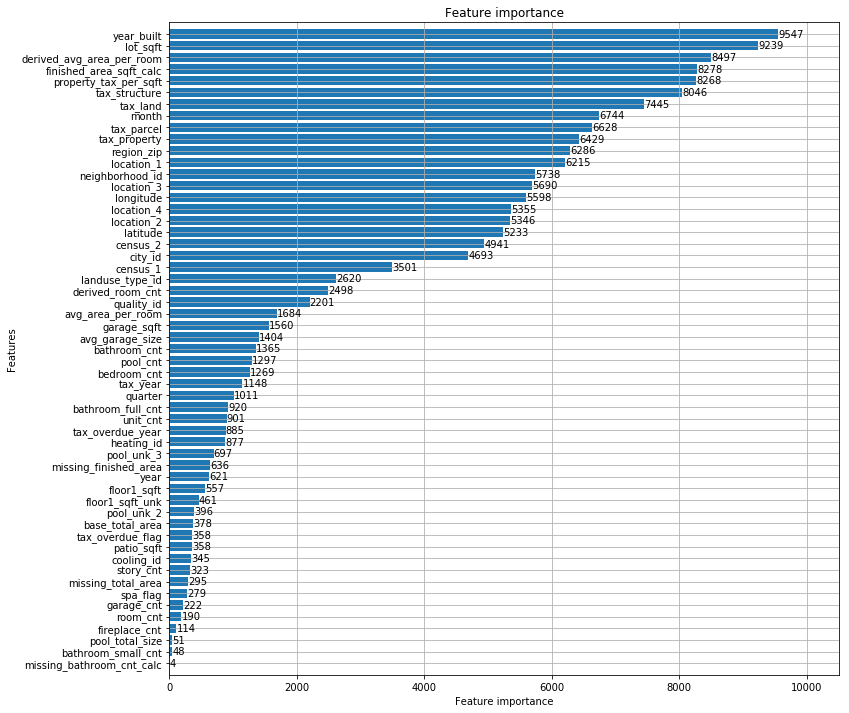

In [13]:
lgb.plot_importance(model, height=0.8, figsize=(12, 12))

## train on all data 

In [14]:
del params['early_stopping_rounds']

#remove outlier from X_train and y_train
outlier_threshold = 0.4
mask = (abs(lgb_y) <= outlier_threshold)
lgb_whole_X = lgb_X[mask, :]
lgb_whole_y = lgb_y[mask]

lgb_whole_train_set = lgb.Dataset(lgb_whole_X, label=lgb_whole_y, feature_name=feature_names)
print("Whole train_X: {}".format(lgb_whole_X.shape))
print("Whole train_y: {}".format(lgb_whole_y.shape))

Whole train_X: (164299, 55)
Whole train_y: (164299,)


In [15]:
model = lgb.train(params, lgb_whole_train_set, verbose_eval=True, 
                 categorical_feature=categorical_indices)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7169
[LightGBM] [Info] Number of data points in the train set: 164299, number of used features: 55
[LightGBM] [Info] Start training from score 0.007873


In [16]:
print('Whole Train score: {}'.format(abs(model.predict(lgb_whole_X) - lgb_whole_y).mean()))

Whole Train score: 0.05009591340964912


In [17]:
train_combined.head()

,parcelid,logerror,cooling_id,architecture_style_id,basement_sqft,bathroom_cnt,bedroom_cnt,framing_id,quality_id,deck_id,floor1_sqft,finished_area_sqft_calc,perimeter_area,floor1_sqft_unk,base_total_area,fips,fireplace_cnt,bathroom_full_cnt,garage_cnt,garage_sqft,spa_flag,heating_id,latitude,longitude,lot_sqft,pool_cnt,pool_total_size,pool_unk_1,pool_unk_2,pool_unk_3,landuse_type_id,census_1,city_id,county_id,neighborhood_id,region_zip,room_cnt,story_id,bathroom_small_cnt,construction_id,unit_cnt,patio_sqft,storage_sqft,year_built,story_cnt,fireplace_flag,tax_structure,tax_parcel,tax_year,tax_land,tax_property,tax_overdue_flag,tax_overdue_year,census_2,county_landuse_code_id,zoning_description_id,avg_garage_size,property_tax_per_sqft,location_1,location_2,location_3,location_4,missing_finished_area,missing_total_area,missing_bathroom_cnt_calc,derived_room_cnt,avg_area_per_room,derived_avg_area_per_room,year,month,quarter
0,11016594,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,NaN,NaN,1684.0,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,261.0,6.037107e+07,12447.0,0.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,3.0,79.0,NaN,3.999929,-84207546.0,152769526.0,-24963278.0,93525258.0,0.0,1.0,0.0,5.0,NaN,336.800000,0,1,1
1,14366692,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,2263.0,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,261.0,6.059052e+07,32380.0,1.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,36.0,NaN,234.0,4.486531,-84009436.0,151345676.0,-25170658.0,92506898.0,0.0,1.0,0.0,7.5,NaN,301.733333,0,1,1
2,12098116,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,NaN,NaN,2217.0,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,261.0,6.037464e+07,47019.0,0.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,3.0,604.0,NaN,5.180189,-84038720.0,152311344.0,-24951204.0,93223828.0,0.0,1.0,0.0,5.0,NaN,443.400000,0,1,1
3,12643413,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,NaN,NaN,839.0,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,266.0,6.037296e+07,12447.0,0.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,13.0,626.0,NaN,3.633778,-84553200.0,152064800.0,-25398700.0,92910300.0,0.0,1.0,0.0,4.0,NaN,209.750000,0,1,1
4,14432541,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,NaN,NaN,2283.0,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,261.0,6.059042e+07,17686.0,1.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,16.0,NaN,299.0,2.404275,-84214591.0,151185877.0,-25364474.0,92335760.0,0.0,1.0,0.0,6.5,285.375,351.230769,0,1,1


## make predictions 

In [18]:
submission_sample = pd.read_csv('/glade/scratch/wmingch/ML_project/Zillow_prize/sample_submission.csv')

In [19]:
submission_sample.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [20]:
def transform_test_features(properties_2016_df, properties_2017_df):
    properties_2016_df_transform = drop_features(properties_2016_df)
    properties_2017_df_transform = drop_features(properties_2017_df)
    
    properties_2016_df_transform['year'] = 0
    properties_2016_df_transform['month'] = 10
    properties_2016_df_transform['quarter'] = 4
    
    properties_2017_df_transform['year'] = 1
    properties_2017_df_transform['month'] = 10
    properties_2017_df_transform['quarter'] = 4
    
    return properties_2016_df_transform, properties_2017_df_transform

In [21]:
def predict_and_output(models, properties_2016_df, properties_2017_df, file_name):
    submission_2016 = pd.DataFrame()
    submission_2017 = pd.DataFrame()
    submission_2016['ParcelId'] = properties_2016_df['parcelid']
    submission_2017['ParcelId'] = properties_2017_df['parcelid']
    
    properties_2016_df_transform, properties_2017_df_transform = transform_test_features(properties_2016_df, properties_2017_df)
    pred_2016, pred_2017 = [], []
    for i, model in enumerate(models):
        print('Start model {} (2016)'.format(i))
        pred_2016.append(model.predict(properties_2016_df_transform))
        print('Start model {} (2017)'.format(i))
        pred_2017.append(model.predict(properties_2017_df_transform))
    
    # take ensemble mean 
    mean_pred_2016 = np.mean(pred_2016, axis=0)
    mean_pred_2017 = np.mean(pred_2017, axis=0)
    
    submission_2016['201610'] = [float(format(x, '.4f')) for x in mean_pred_2016]
    submission_2016['201611'] = submission_2016['201610']
    submission_2016['201612'] = submission_2016['201610']

    submission_2017['201710'] = [float(format(x, '.4f')) for x in mean_pred_2017]
    submission_2017['201711'] = submission_2017['201710']
    submission_2017['201712'] = submission_2017['201710']
    
    submission = submission_2016.merge(how='inner', right=submission_2017, on='ParcelId')
    print(submission.head())
    submission.to_csv(file_name, index=False)
    
    return submission, submission_2016, submission_2017

In [22]:
%%time
file_name = dir_temp + 'LightGBM/LightGBM_single.csv'
predict_and_output([model], properties_2016_df, properties_2017_df, file_name)

Start model 0 (2016)
Start model 0 (2017)
   ParcelId  201610  201611  201612  201710  201711  201712
0  10754147 -0.0237 -0.0237 -0.0237 -0.0198 -0.0198 -0.0198
1  10759547 -0.0179 -0.0179 -0.0179 -0.0165 -0.0165 -0.0165
2  10843547  0.0095  0.0095  0.0095  0.0217  0.0217  0.0217
3  10859147  0.0276  0.0276  0.0276  0.0276  0.0276  0.0276
4  10879947 -0.0020 -0.0020 -0.0020 -0.0015 -0.0015 -0.0015
CPU times: user 47min 38s, sys: 13.6 s, total: 47min 52s
Wall time: 12min 30s


(          ParcelId  201610  201611  201612  201710  201711  201712
 0         10754147 -0.0237 -0.0237 -0.0237 -0.0198 -0.0198 -0.0198
 1         10759547 -0.0179 -0.0179 -0.0179 -0.0165 -0.0165 -0.0165
 2         10843547  0.0095  0.0095  0.0095  0.0217  0.0217  0.0217
 3         10859147  0.0276  0.0276  0.0276  0.0276  0.0276  0.0276
 4         10879947 -0.0020 -0.0020 -0.0020 -0.0015 -0.0015 -0.0015
 ...            ...     ...     ...     ...     ...     ...     ...
 2985212  168176230  0.0416  0.0416  0.0416  0.0218  0.0218  0.0218
 2985213   14273630  0.0416  0.0416  0.0416  0.0026  0.0026  0.0026
 2985214  168040630  0.0416  0.0416  0.0416  0.0073  0.0073  0.0073
 2985215  168040830  0.0416  0.0416  0.0416  0.0163  0.0163  0.0163
 2985216  168040430  0.0416  0.0416  0.0416  0.0069  0.0069  0.0069
 
 [2985217 rows x 7 columns],           ParcelId  201610  201611  201612
 0         10754147 -0.0237 -0.0237 -0.0237
 1         10759547 -0.0179 -0.0179 -0.0179
 2         10843547  0

In [24]:
model.save_model(dir_temp + 'LightGBM/LightGBM_model')